In [ ]:
# This notebook is a descendent from "Gradient Correction 1.ipynb" i  "Gradient Correction 2.ipynb"

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#Change directory
%cd 'drive/My Drive/results/synthetic/'

/content/drive/My Drive/results/synthetic


In [4]:
#!pip uninstall gradient_correction  
!pip install https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main  #Temporarily installed, only for this session.

     / 47.0 MB 7.4 MB/s
  Created wheel for gradient-correction: filename=gradient_correction-0.1-py3-none-any.whl size=10713 sha256=10913786dc03a53efc23769a6f5f9f4500e6d824ef4316f13be667888780a72c
  Stored in directory: /tmp/pip-ephem-wheel-cache-gz4lek7e/wheels/03/4c/0a/9516d8fa386ed9a21d1aa50e8cc5b1f6d6f576195897b24409
Successfully built gradient-correction


In [5]:
import numpy as np
import gradient_correction
from gradient_correction import  helper, explain, model_zoo, geomath, plotter

In [6]:
ls

AUPR_EG.pdf                             Cosine_SG.pdf
AUPR_IG.pdf                             model_params/
AUPR_Saliency.pdf                       Performance_vs_EG_AUPR.pdf
AUPR_SG.pdf                             Performance_vs_EG_AUROC.pdf
AUROC_EG.pdf                            Performance_vs_EGCosine.pdf
AUROC_IG.pdf                            Performance_vs_IG_AUPR.pdf
AUROC_Saliency.pdf                      Performance_vs_IG_AUROC.pdf
AUROC_SG.pdf                            Performance_vs_IGCosine.pdf
cnn_deep_exponential_results.pickle     Performance_vs_SaliencyAUPR.pdf
cnn_deep_relu_results.pickle            Performance_vs_SaliencyAUROC.pdf
cnn_shallow_exponential_results.pickle  Performance_vs_SaliencyCosine.pdf
cnn_shallow_relu_results.pickle         Performance_vs_SG_AUPR.pdf
Cosine_EG.pdf                           Performance_vs_SG_AUROC.pdf
Cosine_IG.pdf                           Performance_vs_SGCosine.pdf
Cosine_Saliency.pdf                     Plot_notebook.ipynb


In [7]:
import pickle
file_cnn_deep_relu = open("cnn_deep_relu_results.pickle", "rb")
file_cnn_deep_exp = open("cnn_deep_exponential_results.pickle", "rb")
file_cnn_shallow_relu = open("cnn_shallow_relu_results.pickle", "rb")
file_cnn_shallow_exp = open("cnn_shallow_exponential_results.pickle", "rb")

In [8]:
results={}

In [9]:
results['deep_relu'] = pickle.load(file_cnn_deep_relu)
results['deep_exp'] = pickle.load(file_cnn_deep_exp)
results['shallow_relu'] = pickle.load(file_cnn_shallow_relu)
results['shallow_exp'] = pickle.load(file_cnn_shallow_exp)

In [10]:
for keys in results['deep_relu']:
    print(keys)

nucleotide_ground_truth
auc
angles
saliency
intgrad
smoothgrad
expintgrad


In [11]:
Performance={}
Performance['deep_relu'] = np.array(results['deep_relu']['auc'])
Performance['deep_exp'] = np.array(results['deep_exp']['auc'])
Performance['shallow_relu'] = np.array(results['shallow_relu']['auc'])
Performance['shallow_exp'] = np.array(results['shallow_exp']['auc'])
print(Performance['deep_relu'].shape)

nucleotide_motif_labels = results['deep_relu']['nucleotide_ground_truth'] #Same for all models, because same data. 

(50,)


# Saliency

In [12]:
Cosine={}
Cosine['deep_relu']=np.array(results['deep_relu']['saliency']['cos_dist'])
Cosine['deep_exp']=np.array(results['deep_exp']['saliency']['cos_dist'])
Cosine['shallow_relu']=np.array(results['shallow_relu']['saliency']['cos_dist'])
Cosine['shallow_exp']=np.array(results['shallow_exp']['saliency']['cos_dist'])
Cosine_adj={}
Cosine_adj['deep_relu']=np.array(results['deep_relu']['saliency']['adj_cos_dist'])
Cosine_adj['deep_exp']=np.array(results['deep_exp']['saliency']['adj_cos_dist'])
Cosine_adj['shallow_relu']=np.array(results['shallow_relu']['saliency']['adj_cos_dist'])
Cosine_adj['shallow_exp']=np.array(results['shallow_exp']['saliency']['adj_cos_dist'])

Improvement={}
Improvement['deep_relu']=np.array(results['deep_relu']['saliency']['improvement'])
Improvement['deep_exp']=np.array(results['deep_exp']['saliency']['improvement'])
Improvement['shallow_relu']=np.array(results['shallow_relu']['saliency']['improvement'])
Improvement['shallow_exp']=np.array(results['shallow_exp']['saliency']['improvement'])


Auroc={}
Auroc['deep_relu']=np.average(np.array(results['deep_relu']['saliency']['auroc_scores']), axis=-1)
Auroc['deep_exp']=np.average(np.array(results['deep_exp']['saliency']['auroc_scores']), axis=-1)
Auroc['shallow_relu']=np.average(np.array(results['shallow_relu']['saliency']['auroc_scores']), axis=-1)
Auroc['shallow_exp']=np.average(np.array(results['shallow_exp']['saliency']['auroc_scores']), axis=-1)
Auroc_adj={}
Auroc_adj['deep_relu']=np.average(np.array(results['deep_relu']['saliency']['auroc_adj_scores']), axis=-1)
Auroc_adj['deep_exp']=np.average(np.array(results['deep_exp']['saliency']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['saliency']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['saliency']['auroc_adj_scores']), axis=-1)


Aupr={}
Aupr['deep_relu']=np.average(np.array(results['deep_relu']['saliency']['aupr_scores']), axis=-1)
Aupr['deep_exp']=np.average(np.array(results['deep_exp']['saliency']['aupr_scores']), axis=-1)
Aupr['shallow_relu']=np.average(np.array(results['shallow_relu']['saliency']['aupr_scores']), axis=-1)
Aupr['shallow_exp']=np.average(np.array(results['shallow_exp']['saliency']['aupr_scores']), axis=-1)
Aupr_adj={}
Aupr_adj['deep_relu']=np.average(np.array(results['deep_relu']['saliency']['aupr_adj_scores']), axis=-1)
Aupr_adj['deep_exp']=np.average(np.array(results['deep_exp']['saliency']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['saliency']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['saliency']['aupr_adj_scores']), axis=-1)

Angles={}
Angles['deep_relu']=np.array(results['deep_relu']['angles'])
Angles['deep_exp']=np.array(results['deep_exp']['angles'])
Angles['shallow_relu']=np.array(results['shallow_relu']['angles'])
Angles['shallow_exp']=np.array(results['shallow_exp']['angles'])

scores_saliency = {}
scores_saliency['deep_relu']=np.array(results['deep_relu']['saliency']['scores'])
scores_saliency['deep_exp']=np.array(results['deep_exp']['saliency']['scores'])
scores_saliency['shallow_relu']=np.array(results['shallow_relu']['saliency']['scores'])
scores_saliency['shallow_exp']=np.array(results['shallow_exp']['saliency']['scores'])

scores_times_input = {}
scores_times_input['deep_relu']=np.array(results['deep_relu']['saliency']['scores_times_input'])
scores_times_input['deep_exp']=np.array(results['deep_exp']['saliency']['scores_times_input'])
scores_times_input['shallow_relu']=np.array(results['shallow_relu']['saliency']['scores_times_input'])
scores_times_input['shallow_exp']=np.array(results['shallow_exp']['saliency']['scores_times_input'])

scores_times_input_adj = {}
scores_times_input_adj['deep_relu']=np.array(results['deep_relu']['saliency']['adj_scores_times_input'])
scores_times_input_adj['deep_exp']=np.array(results['deep_exp']['saliency']['adj_scores_times_input'])
scores_times_input_adj['shallow_relu']=np.array(results['shallow_relu']['saliency']['adj_scores_times_input'])
scores_times_input_adj['shallow_exp']=np.array(results['shallow_exp']['saliency']['adj_scores_times_input'])


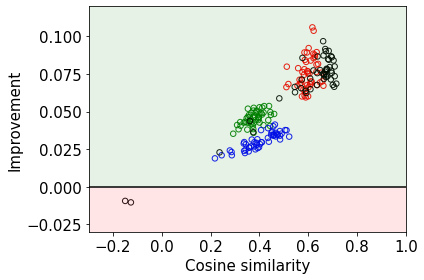

In [13]:
# Saliency Cosine
file_save = 'Cosine_Saliency.pdf'
plotter.plot_improvement(Cosine, Cosine_adj,  x_min=-0.3, x_max=1, y_min=-0.03, y_max=0.12, x_label = 'Cosine similarity', file_save = file_save)

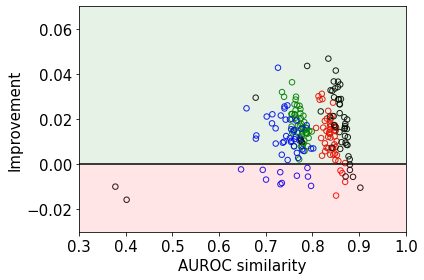

In [14]:
#Saliency AUROC
file_save = 'AUROC_Saliency.pdf'
plotter.plot_improvement(Auroc, Auroc_adj,  x_min=0.3, x_max=1, y_min=-0.03, y_max=0.07, x_label = 'AUROC similarity', file_save = file_save)

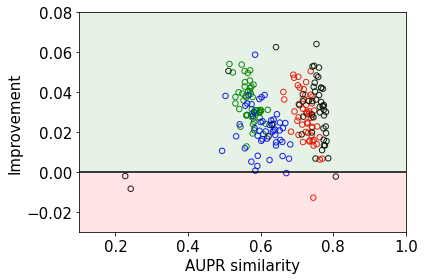

In [15]:
#Saliency AUPR
file_save = 'AUPR_Saliency.pdf'
plotter.plot_improvement(Aupr, Aupr_adj,  x_min=0.1, x_max=1, y_min=-0.03, y_max=0.08, x_label = 'AUPR similarity', file_save = file_save)

Interpretability vs Performance


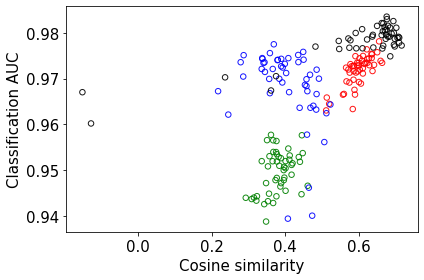

In [16]:
# Saliency Cosine
file_save = 'Performance_vs_SaliencyCosine.pdf'
plotter.plot_attribution_vs_performance(Cosine, Performance, x_label = 'Cosine similarity', file_save = file_save)

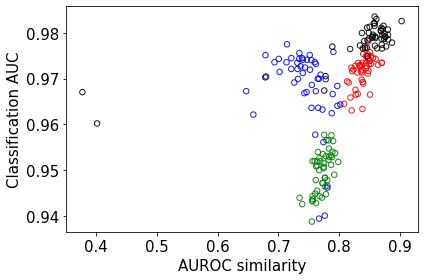

In [17]:
# SaliencyAUROC
file_save = 'Performance_vs_SaliencyAUROC.pdf'
plotter.plot_attribution_vs_performance(Auroc, Performance, x_label = 'AUROC similarity', file_save = file_save)

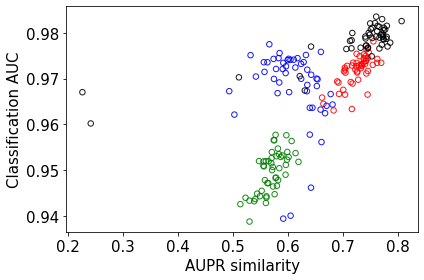

In [18]:
# SaliencyAUPR
file_save = 'Performance_vs_SaliencyAUPR.pdf'
plotter.plot_attribution_vs_performance(Aupr, Performance, x_label = 'AUPR similarity', file_save = file_save)

# ANGLE STATISTICS

# model_ = 'deep_exp'

In [24]:
model_ = 'deep_exp'

sine = np.array(Angles[model_])
improvement =np.array(Improvement[model_])
wild_saliency = scores_times_input[model_]
wild_saliency_adj = scores_times_input_adj[model_]
L=len(scores_saliency[model_])

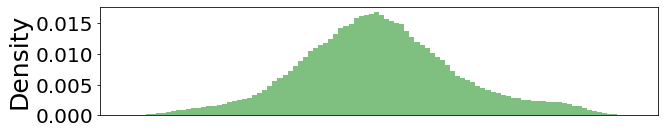

In [25]:
#POSITIVE nucleotides (nucleotides belonging to motifs): Angle distribution.
index_ = nucleotide_motif_labels
plotter.plot_angle_distribution(index_, L, sine, ticks=[0.0, 0.005, 0.01, 0.015], fontsize=25, y_label='Density')

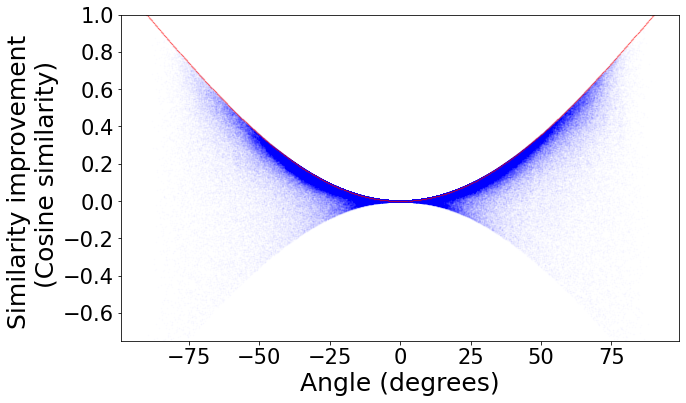

In [26]:
#POSITIVE nucleotides (nucleotides belonging to motifs): Improvement versus angles.
index_ = nucleotide_motif_labels
plotter.plot_improvement_vs_angle_motif(index_, L, sine, improvement, fontsize=25)

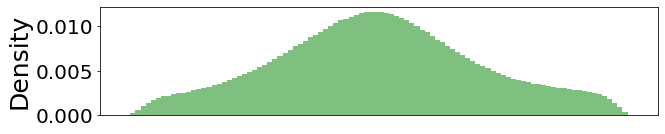

In [27]:
#NEGATIVE nucleotides (nucleotides not belonging to motifs): Angle distribution.
index_ = np.logical_not(nucleotide_motif_labels)
plotter.plot_angle_distribution(index_, L, sine, ticks=[0.0, 0.005, 0.01, 0.015], fontsize=25, y_label='Density')

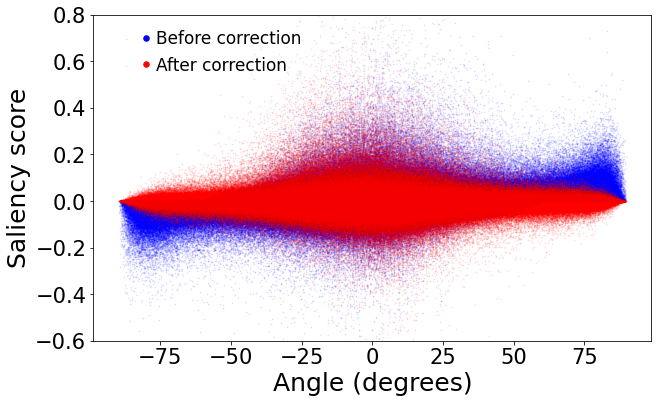

In [28]:
# NEGATIVE nucleotides (nucleotides not belonging to motifs): Spurious saliency scores before and after correction.
index_ = np.logical_not(nucleotide_motif_labels)
plotter.plot_improvement_vs_angle_nonmotif(index_, L, sine, wild_saliency, wild_saliency_adj, fontsize=25)

# model_ = 'deep_relu'

In [29]:
model_ = 'deep_relu'

sine = np.array(Angles[model_])
improvement =np.array(Improvement[model_])
wild_saliency = scores_times_input[model_]
wild_saliency_adj = scores_times_input_adj[model_]
L=len(scores_saliency[model_])

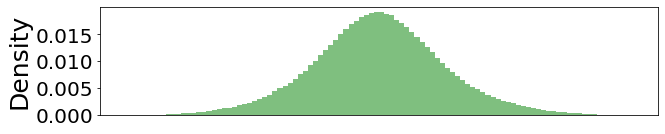

In [30]:
#POSITIVE nucleotides (nucleotides belonging to motifs): Angle distribution.
index_ = nucleotide_motif_labels
plotter.plot_angle_distribution(index_, L, sine, ticks=[0.0, 0.005, 0.01, 0.015], fontsize=25, y_label='Density')

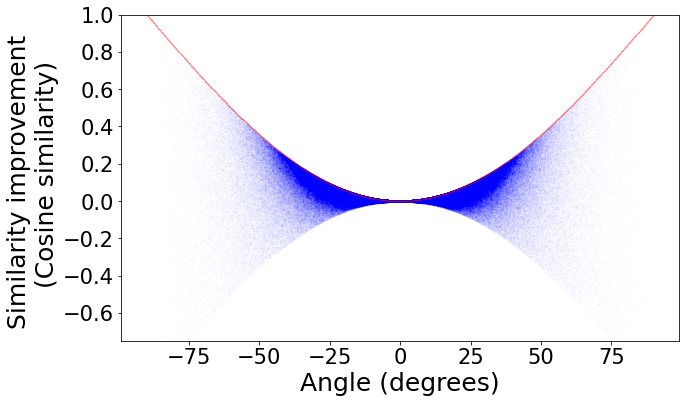

In [31]:
#POSITIVE nucleotides (nucleotides belonging to motifs): Improvement versus angles.
index_ = nucleotide_motif_labels
plotter.plot_improvement_vs_angle_motif(index_, L, sine, improvement, fontsize=25)

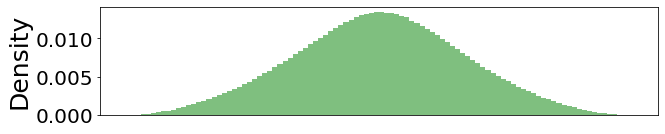

In [32]:
#NEGATIVE nucleotides (nucleotides not belonging to motifs): Angle distribution.
index_ = np.logical_not(nucleotide_motif_labels)
plotter.plot_angle_distribution(index_, L, sine, ticks=[0.0, 0.005, 0.01, 0.015], fontsize=25, y_label='Density')

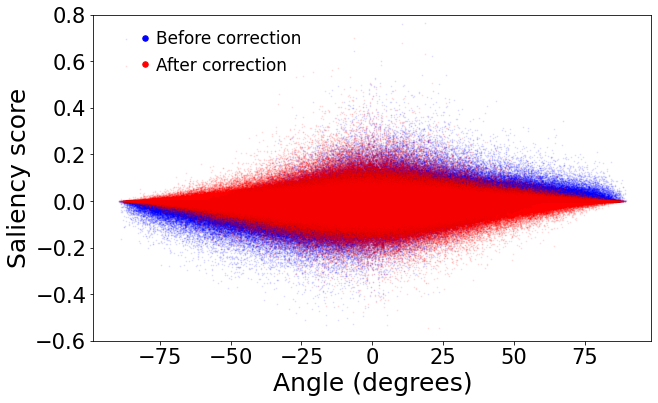

In [33]:
# NEGATIVE nucleotides (nucleotides not belonging to motifs): Spurious saliency scores before and after correction.
index_ = np.logical_not(nucleotide_motif_labels)
plotter.plot_improvement_vs_angle_nonmotif(index_, L, sine, wild_saliency, wild_saliency_adj, fontsize=25)

# model_ = 'shallow_exp'

In [39]:
model_ = 'shallow_exp'

sine = np.array(Angles[model_])
improvement =np.array(Improvement[model_])
wild_saliency = scores_times_input[model_]
wild_saliency_adj = scores_times_input_adj[model_]
L=len(scores_saliency[model_])

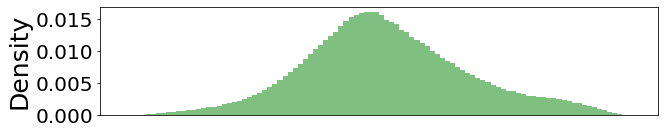

In [35]:
#POSITIVE nucleotides (nucleotides belonging to motifs): Angle distribution.
index_ = nucleotide_motif_labels
plotter.plot_angle_distribution(index_, L, sine, ticks=[0.0, 0.005, 0.01, 0.015], fontsize=25, y_label='Density')

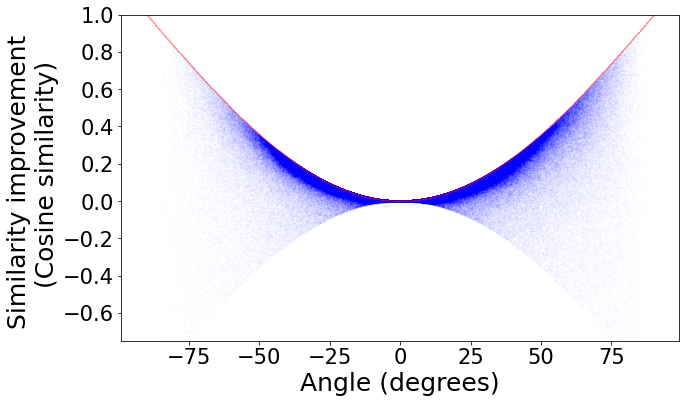

In [36]:
#POSITIVE nucleotides (nucleotides belonging to motifs): Improvement versus angles.
index_ = nucleotide_motif_labels
plotter.plot_improvement_vs_angle_motif(index_, L, sine, improvement, fontsize=25)

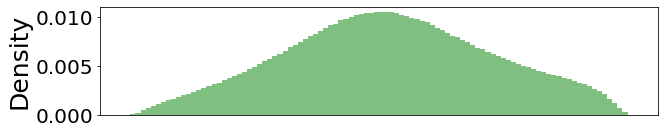

In [37]:
#NEGATIVE nucleotides (nucleotides not belonging to motifs): Angle distribution.
index_ = np.logical_not(nucleotide_motif_labels)
plotter.plot_angle_distribution(index_, L, sine, ticks=[0.0, 0.005, 0.01, 0.015], fontsize=25, y_label='Density')

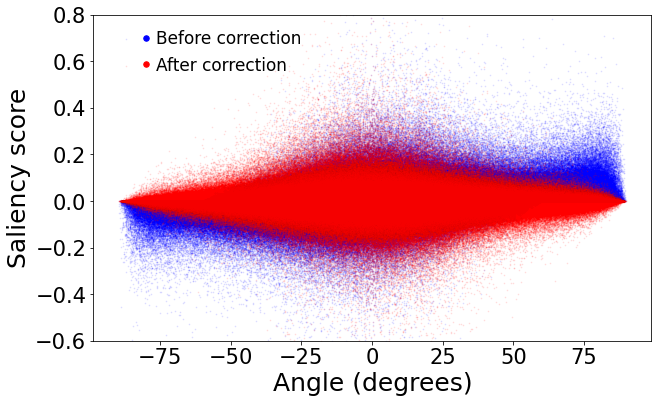

In [38]:
# NEGATIVE nucleotides (nucleotides not belonging to motifs): Spurious saliency scores before and after correction.
index_ = np.logical_not(nucleotide_motif_labels)
plotter.plot_improvement_vs_angle_nonmotif(index_, L, sine, wild_saliency, wild_saliency_adj, fontsize=25)

# model_ = 'shallow_relu'

In [40]:
model_ = 'shallow_relu'

sine = np.array(Angles[model_])
improvement =np.array(Improvement[model_])
wild_saliency = scores_times_input[model_]
wild_saliency_adj = scores_times_input_adj[model_]
L=len(scores_saliency[model_])

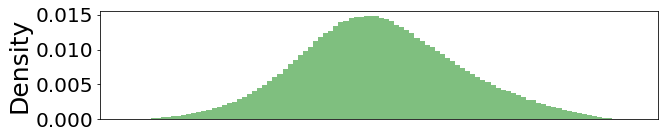

In [41]:
#POSITIVE nucleotides (nucleotides belonging to motifs): Angle distribution.
index_ = nucleotide_motif_labels
plotter.plot_angle_distribution(index_, L, sine, ticks=[0.0, 0.005, 0.01, 0.015], fontsize=25, y_label='Density')

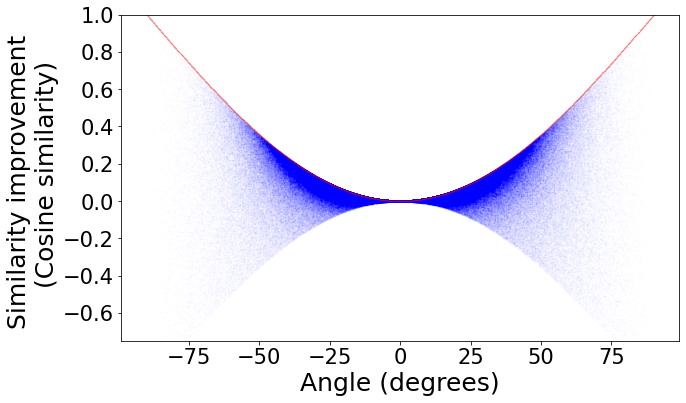

In [42]:
#POSITIVE nucleotides (nucleotides belonging to motifs): Improvement versus angles.
index_ = nucleotide_motif_labels
plotter.plot_improvement_vs_angle_motif(index_, L, sine, improvement, fontsize=25)

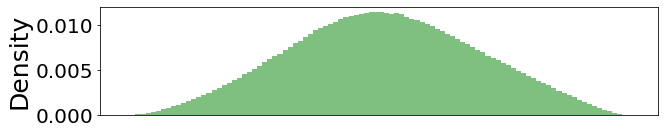

In [43]:
#NEGATIVE nucleotides (nucleotides not belonging to motifs): Angle distribution.
index_ = np.logical_not(nucleotide_motif_labels)
plotter.plot_angle_distribution(index_, L, sine, ticks=[0.0, 0.005, 0.01, 0.015], fontsize=25, y_label='Density')

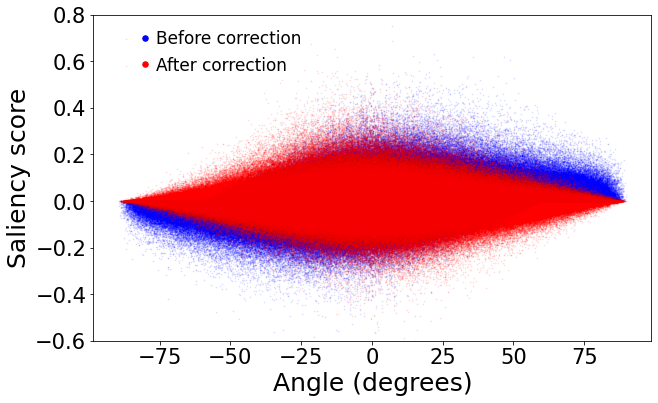

In [44]:
# NEGATIVE nucleotides (nucleotides not belonging to motifs): Spurious saliency scores before and after correction.
index_ = np.logical_not(nucleotide_motif_labels)
plotter.plot_improvement_vs_angle_nonmotif(index_, L, sine, wild_saliency, wild_saliency_adj, fontsize=25)

# ANECDOTAL (last...)

In [25]:
! pip install logomaker
import logomaker

     |████████████████████████████████| 11.8 MB 10.5 MB/s 


In [24]:
saliency_map_raw #=Scores, of interest. 
saliency_map_raw_CORRECTED = np.array(saliency_map_raw) - 0.25 * np.sum(saliency_map_raw, axis=2, keepdims=True) 

s=9 #Pick a sequence 42
run_=2

X_50=[]
for i in range (0,len(saliency_map_raw_cummulative)):
    X_50.append(X)   
X_50=np.array(X_50)  

sine_dimensionsadapted=np.expand_dims(sine,3)[run_] * np.sqrt(np.sum(np.square(saliency_map_raw),axis=2,keepdims=True))

from matplotlib.ticker import FormatStrFormatter

import logomaker 

# PLOT for p=0 parameter (default classical saliency)
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = saliency_map_raw[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()


# PLOT for p=-0.333 parameter 
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = saliency_map_raw_CORRECTED[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

# PLOT ground truth
N, L, A = sine_dimensionsadapted.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('∧'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = (sine_dimensionsadapted)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    fig = plt.gcf()


# PLOT ground truth
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = np.swapaxes(X_model-0.25, 1,2)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

NameError: ignored

In [ ]:
'''!pip install https://github.com/p-koo/tfomics/tarball/master

In [25]:
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
s=1 #Pick a sequence 42

# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()


# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = adj_scores[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = X_model_centered[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

'''# PLOT ground truth
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = np.swapaxes(X_model-0.25, 1,2)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()'''

NameError: ignored

# Integrated gradient

In [ ]:
Cosine={}
Cosine['deep_relu']=np.array(results['deep_relu']['intgrad']['cos_dist'])
Cosine['deep_exp']=np.array(results['deep_exp']['intgrad']['cos_dist'])
Cosine['shallow_relu']=np.array(results['shallow_relu']['intgrad']['cos_dist'])
Cosine['shallow_exp']=np.array(results['shallow_exp']['intgrad']['cos_dist'])
Cosine_adj={}
Cosine_adj['deep_relu']=np.array(results['deep_relu']['intgrad']['adj_cos_dist'])
Cosine_adj['deep_exp']=np.array(results['deep_exp']['intgrad']['adj_cos_dist'])
Cosine_adj['shallow_relu']=np.array(results['shallow_relu']['intgrad']['adj_cos_dist'])
Cosine_adj['shallow_exp']=np.array(results['shallow_exp']['intgrad']['adj_cos_dist'])

Improvement={}
Improvement['deep_relu']=np.array(results['deep_relu']['intgrad']['improvement'])
Improvement['deep_exp']=np.array(results['deep_exp']['intgrad']['improvement'])
Improvement['shallow_relu']=np.array(results['shallow_relu']['intgrad']['improvement'])
Improvement['shallow_exp']=np.array(results['shallow_exp']['intgrad']['improvement'])


Auroc={}
Auroc['deep_relu']=np.average(np.array(results['deep_relu']['intgrad']['auroc_scores']), axis=-1)
Auroc['deep_exp']=np.average(np.array(results['deep_exp']['intgrad']['auroc_scores']), axis=-1)
Auroc['shallow_relu']=np.average(np.array(results['shallow_relu']['intgrad']['auroc_scores']), axis=-1)
Auroc['shallow_exp']=np.average(np.array(results['shallow_exp']['intgrad']['auroc_scores']), axis=-1)
Auroc_adj={}
Auroc_adj['deep_relu']=np.average(np.array(results['deep_relu']['intgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['deep_exp']=np.average(np.array(results['deep_exp']['intgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['intgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['intgrad']['auroc_adj_scores']), axis=-1)


Aupr={}
Aupr['deep_relu']=np.average(np.array(results['deep_relu']['intgrad']['aupr_scores']), axis=-1)
Aupr['deep_exp']=np.average(np.array(results['deep_exp']['intgrad']['aupr_scores']), axis=-1)
Aupr['shallow_relu']=np.average(np.array(results['shallow_relu']['intgrad']['aupr_scores']), axis=-1)
Aupr['shallow_exp']=np.average(np.array(results['shallow_exp']['intgrad']['aupr_scores']), axis=-1)
Aupr_adj={}
Aupr_adj['deep_relu']=np.average(np.array(results['deep_relu']['intgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['deep_exp']=np.average(np.array(results['deep_exp']['intgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['intgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['intgrad']['aupr_adj_scores']), axis=-1)

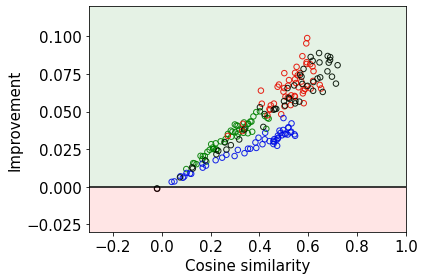

In [27]:
# IG Cosine
file_save = 'Cosine_IG.pdf'
plotter.plot_improvement(Cosine, Cosine_adj,  x_min=-0.3, x_max=1, y_min=-0.03, y_max=0.12, x_label = 'Cosine similarity', file_save = file_save)

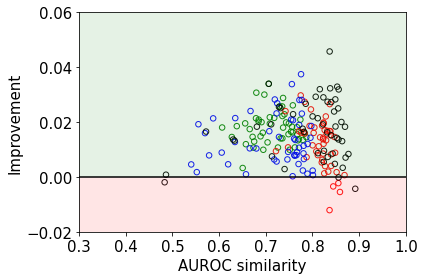

In [28]:
#IG AUROC
file_save = 'AUROC_IG.pdf'
plotter.plot_improvement(Auroc, Auroc_adj,  x_min=0.3, x_max=1, y_min=-0.02, y_max=0.06, x_label = 'AUROC similarity', file_save = file_save)

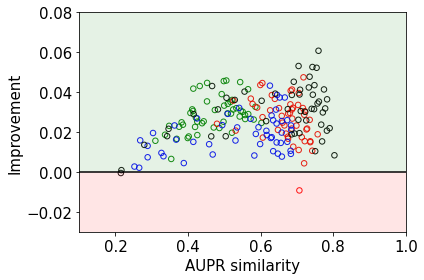

In [29]:
#IG AUPR
file_save = 'AUPR_IG.pdf'
plotter.plot_improvement(Aupr, Aupr_adj,  x_min=0.1, x_max=1, y_min=-0.03, y_max=0.08, x_label = 'AUPR similarity', file_save = file_save)

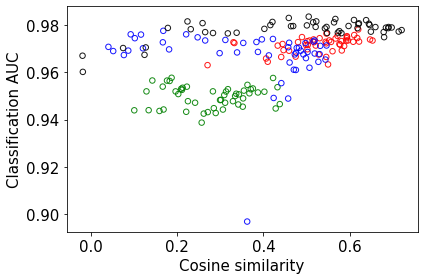

In [30]:
# IG Cosine
file_save = 'Performance_vs_IGCosine.pdf'
plotter.plot_attribution_vs_performance(Cosine, Performance, x_label = 'Cosine similarity', file_save = file_save)

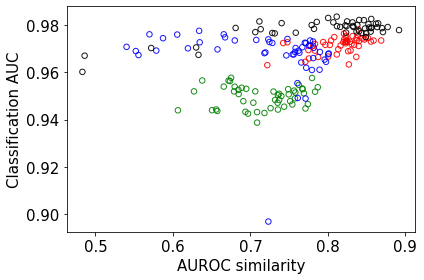

In [31]:
# IG AUROC
file_save = 'Performance_vs_IG_AUROC.pdf'
plotter.plot_attribution_vs_performance(Auroc, Performance, x_label = 'AUROC similarity', file_save = file_save)

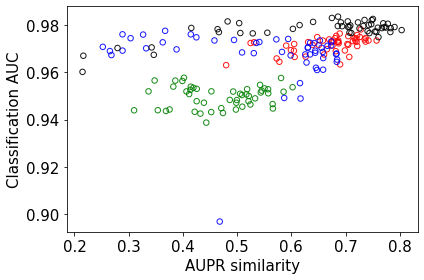

In [32]:
# IG AUPR
file_save = 'Performance_vs_IG_AUPR.pdf'
plotter.plot_attribution_vs_performance(Aupr, Performance, x_label = 'AUPR similarity', file_save = file_save)

In [19]:
# Needed for X_model_centered in Logomaker anecdotal plots

"""
Evaluate models on synthetic data: classification and interpretability performance.
""" 
import os
import numpy as np
from six.moves import cPickle
from tensorflow import keras
from gradient_correction import helper, explain, model_zoo, geomath

#------------------------------------------------------------------------

num_trials = 50  
model_names = ['cnn_deep', 'cnn_shallow'] 
activations = ['relu', 'exponential']  
attr_methods = ['saliency', 'intgrad'] #['saliency', 'smoothgrad', 'intgrad', 'expintgrad']

results_path = os.path.join('../results', 'synthetic')  
params_path = os.path.join(results_path, 'model_params')  

#------------------------------------------------------------------------

# load data
data_path = '../data/synthetic_code_dataset.h5'
x_train, y_train, x_valid, y_valid, x_test, y_test = helper.load_data(data_path)  

# get shapes
input_shape = x_train.shape[1:]
output_shape = y_train.shape[1]

# load ground truth values
test_model = helper.load_synthetic_models(data_path, dataset='test')
true_index = np.where(y_test[:,0] == 1)[0]
X = x_test[true_index][:500]  
X_model = test_model[true_index][:500]  
X_model_centered =  X_model - 0.25

# Smoothgrad

In [33]:
Cosine={}
Cosine['deep_relu']=np.array(results['deep_relu']['smoothgrad']['cos_dist'])
Cosine['deep_exp']=np.array(results['deep_exp']['smoothgrad']['cos_dist'])
Cosine['shallow_relu']=np.array(results['shallow_relu']['smoothgrad']['cos_dist'])
Cosine['shallow_exp']=np.array(results['shallow_exp']['smoothgrad']['cos_dist'])
Cosine_adj={}
Cosine_adj['deep_relu']=np.array(results['deep_relu']['smoothgrad']['adj_cos_dist'])
Cosine_adj['deep_exp']=np.array(results['deep_exp']['smoothgrad']['adj_cos_dist'])
Cosine_adj['shallow_relu']=np.array(results['shallow_relu']['smoothgrad']['adj_cos_dist'])
Cosine_adj['shallow_exp']=np.array(results['shallow_exp']['smoothgrad']['adj_cos_dist'])

Auroc={}
Auroc['deep_relu']=np.average(np.array(results['deep_relu']['smoothgrad']['auroc_scores']), axis=-1)
Auroc['deep_exp']=np.average(np.array(results['deep_exp']['smoothgrad']['auroc_scores']), axis=-1)
Auroc['shallow_relu']=np.average(np.array(results['shallow_relu']['smoothgrad']['auroc_scores']), axis=-1)
Auroc['shallow_exp']=np.average(np.array(results['shallow_exp']['smoothgrad']['auroc_scores']), axis=-1)
Auroc_adj={}
Auroc_adj['deep_relu']=np.average(np.array(results['deep_relu']['smoothgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['deep_exp']=np.average(np.array(results['deep_exp']['smoothgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['smoothgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['smoothgrad']['auroc_adj_scores']), axis=-1)

Aupr={}
Aupr['deep_relu']=np.average(np.array(results['deep_relu']['smoothgrad']['aupr_scores']), axis=-1)
Aupr['deep_exp']=np.average(np.array(results['deep_exp']['smoothgrad']['aupr_scores']), axis=-1)
Aupr['shallow_relu']=np.average(np.array(results['shallow_relu']['smoothgrad']['aupr_scores']), axis=-1)
Aupr['shallow_exp']=np.average(np.array(results['shallow_exp']['smoothgrad']['aupr_scores']), axis=-1)
Aupr_adj={}
Aupr_adj['deep_relu']=np.average(np.array(results['deep_relu']['smoothgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['deep_exp']=np.average(np.array(results['deep_exp']['smoothgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['smoothgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['smoothgrad']['aupr_adj_scores']), axis=-1)

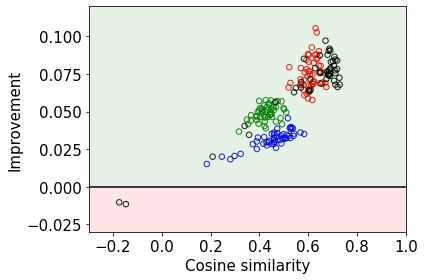

In [34]:
# SG Cosine
file_save = 'Cosine_SG.pdf'
plotter.plot_improvement(Cosine, Cosine_adj,  x_min=-0.3, x_max=1, y_min=-0.03, y_max=0.12, x_label = 'Cosine similarity', file_save = file_save)

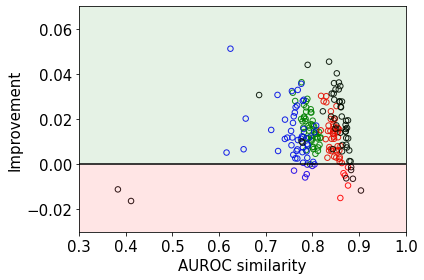

In [35]:
#SG AUROC
file_save = 'AUROC_SG.pdf'
plotter.plot_improvement(Auroc, Auroc_adj,  x_min=0.3, x_max=1, y_min=-0.03, y_max=0.07, x_label = 'AUROC similarity', file_save = file_save)

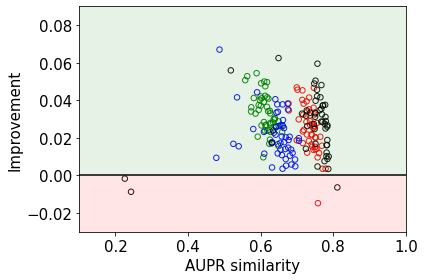

In [36]:
#SG AUPR
file_save = 'AUPR_SG.pdf'
plotter.plot_improvement(Aupr, Aupr_adj,  x_min=0.1, x_max=1, y_min=-0.03, y_max=0.09, x_label = 'AUPR similarity', file_save = file_save)

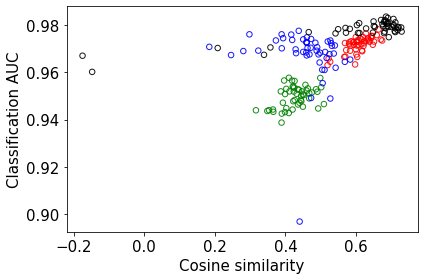

In [37]:
# SG Cosine
file_save = 'Performance_vs_SGCosine.pdf'
plotter.plot_attribution_vs_performance(Cosine, Performance, x_label = 'Cosine similarity', file_save = file_save)

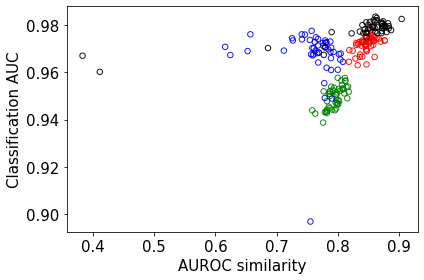

In [38]:
# SG AUROC
file_save = 'Performance_vs_SG_AUROC.pdf'
plotter.plot_attribution_vs_performance(Auroc, Performance, x_label = 'AUROC similarity', file_save = file_save)

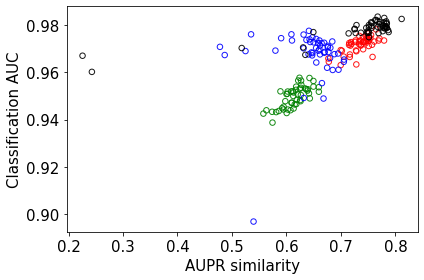

In [39]:
# SG AUPR
file_save = 'Performance_vs_SG_AUPR.pdf'
plotter.plot_attribution_vs_performance(Aupr, Performance, x_label = 'AUPR similarity', file_save = file_save)

# Expintgrad

In [40]:
Cosine={}
Cosine['deep_relu']=np.array(results['deep_relu']['expintgrad']['cos_dist'])
Cosine['deep_exp']=np.array(results['deep_exp']['expintgrad']['cos_dist'])
Cosine['shallow_relu']=np.array(results['shallow_relu']['expintgrad']['cos_dist'])
Cosine['shallow_exp']=np.array(results['shallow_exp']['expintgrad']['cos_dist'])
Cosine_adj={}
Cosine_adj['deep_relu']=np.array(results['deep_relu']['expintgrad']['adj_cos_dist'])
Cosine_adj['deep_exp']=np.array(results['deep_exp']['expintgrad']['adj_cos_dist'])
Cosine_adj['shallow_relu']=np.array(results['shallow_relu']['expintgrad']['adj_cos_dist'])
Cosine_adj['shallow_exp']=np.array(results['shallow_exp']['expintgrad']['adj_cos_dist'])

Auroc={}
Auroc['deep_relu']=np.average(np.array(results['deep_relu']['expintgrad']['auroc_scores']), axis=-1)
Auroc['deep_exp']=np.average(np.array(results['deep_exp']['expintgrad']['auroc_scores']), axis=-1)
Auroc['shallow_relu']=np.average(np.array(results['shallow_relu']['expintgrad']['auroc_scores']), axis=-1)
Auroc['shallow_exp']=np.average(np.array(results['shallow_exp']['expintgrad']['auroc_scores']), axis=-1)
Auroc_adj={}
Auroc_adj['deep_relu']=np.average(np.array(results['deep_relu']['expintgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['deep_exp']=np.average(np.array(results['deep_exp']['expintgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['expintgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['expintgrad']['auroc_adj_scores']), axis=-1)

Aupr={}
Aupr['deep_relu']=np.average(np.array(results['deep_relu']['expintgrad']['aupr_scores']), axis=-1)
Aupr['deep_exp']=np.average(np.array(results['deep_exp']['expintgrad']['aupr_scores']), axis=-1)
Aupr['shallow_relu']=np.average(np.array(results['shallow_relu']['expintgrad']['aupr_scores']), axis=-1)
Aupr['shallow_exp']=np.average(np.array(results['shallow_exp']['expintgrad']['aupr_scores']), axis=-1)
Aupr_adj={}
Aupr_adj['deep_relu']=np.average(np.array(results['deep_relu']['expintgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['deep_exp']=np.average(np.array(results['deep_exp']['expintgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['expintgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['expintgrad']['aupr_adj_scores']), axis=-1)

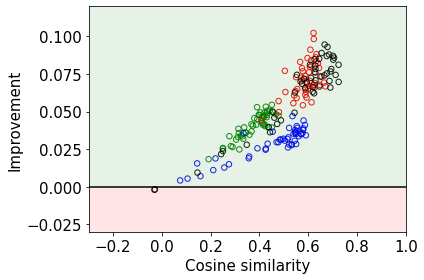

In [41]:
# EG Cosine
file_save = 'Cosine_EG.pdf'
plotter.plot_improvement(Cosine, Cosine_adj,  x_min=-0.3, x_max=1, y_min=-0.03, y_max=0.12, x_label = 'Cosine similarity', file_save = file_save)

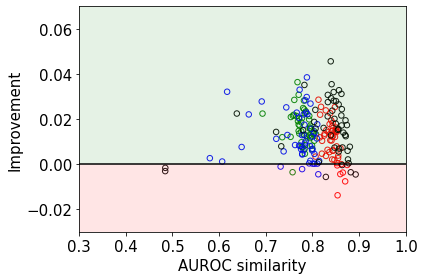

In [42]:
#EG AUROC
file_save = 'AUROC_EG.pdf'
plotter.plot_improvement(Auroc, Auroc_adj,  x_min=0.3, x_max=1, y_min=-0.03, y_max=0.07, x_label = 'AUROC similarity', file_save = file_save)

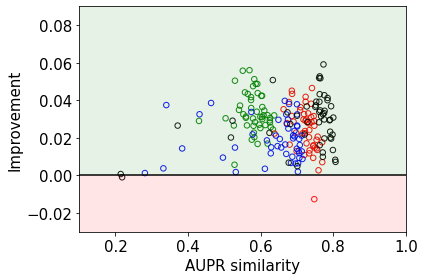

In [43]:
#EG AUPR
file_save = 'AUPR_EG.pdf'
plotter.plot_improvement(Aupr, Aupr_adj,  x_min=0.1, x_max=1, y_min=-0.03, y_max=0.09, x_label = 'AUPR similarity', file_save = file_save)

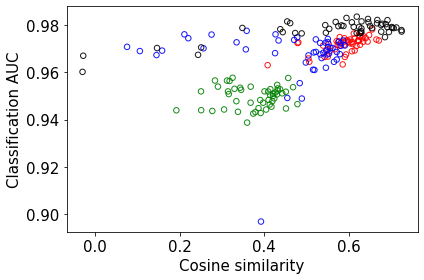

In [44]:
# EG Cosine
file_save = 'Performance_vs_EGCosine.pdf'
plotter.plot_attribution_vs_performance(Cosine, Performance, x_label = 'Cosine similarity', file_save = file_save)

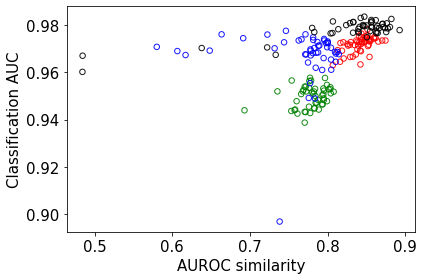

In [45]:
# EG AUROC
file_save = 'Performance_vs_EG_AUROC.pdf'
plotter.plot_attribution_vs_performance(Auroc, Performance, x_label = 'AUROC similarity', file_save = file_save)

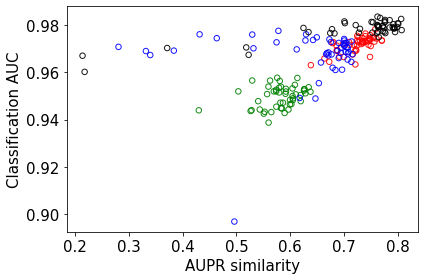

In [46]:
# EG AUPR
file_save = 'Performance_vs_EG_AUPR.pdf'
plotter.plot_attribution_vs_performance(Aupr, Performance, x_label = 'AUPR similarity', file_save = file_save)